# Machine Learning
Machine Learning is the field of artificial intelligence that deals with algorithms that enable machines to learn from data without being explicitly programmed.

In this course, we'll study two categories of machine learning algorithms: *Supervised Learning* and *Unsupervised Learning*

## Supervised Learning
It involves learning a model that maps the **features** of data to the **labels** associated with it. Once a model is learned, we can predict the *unknown labels* for *new unseen data*. It is divided into two types: *Classification* and *Regression*.
### Classification
A classification model predicts *discrete values*. For example, classification models make predictions that answer questions like:
+ Is a given email message spam or not spam?
- Is this an image of a dog, a cat, or a mouse?

### Regression
A regression model predicts *continuous values*. For example, regression models make predictions that answer questions like:
- What is the price of a house in Kathmandu?
- What is the probability that a user will click on this ad?

## Unsupervised Learning
It involves making a model of **features** without any labels. This category of tasks deals with clustering data into groups and dimensionality reduction among others.

---
# Scikit-learn
Moving forward, we'll be building most of our machine learning models using a popular library for machine learning called *scikit-learn*.

We'll start by introducing a very simple supervised learning model for regression task known as *Linear Regression*.

---

# Linear Regression
In a simple linear regression, we have a variable $y$ that depends upon another variable $x$ and we're basically trying to learn a straight line.

$\hat{y}=mx+c$

Using the data $(x,y)$, we want to know the values of the *slope* $m$ and the *y-intercept* $c$ of the line that best describes the data. How good a line fits can be quantified in terms of *mean squared error* (MSE) between actual values $y$ and predicted values $\hat{y}$. The goal is to find a line whose mean squared error is minimum. This can be done using algorithms like *ordinary least squares* or *gradient descent*.

$MSE(y,\hat{y})=\large\frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat{y_i})^2}$

[Linear Regression Visualization](http://setosa.io/ev/ordinary-least-squares-regression/)

This simple idea can be extended further into multivariable linear regression where the dependent variable $y$ depends upon more than one independent variables $x1$, $x2$, $x3$ and so on.

Let's see an example of learning a simple linear regression model using scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize'] = 8, 6
plt.style.use('ggplot')

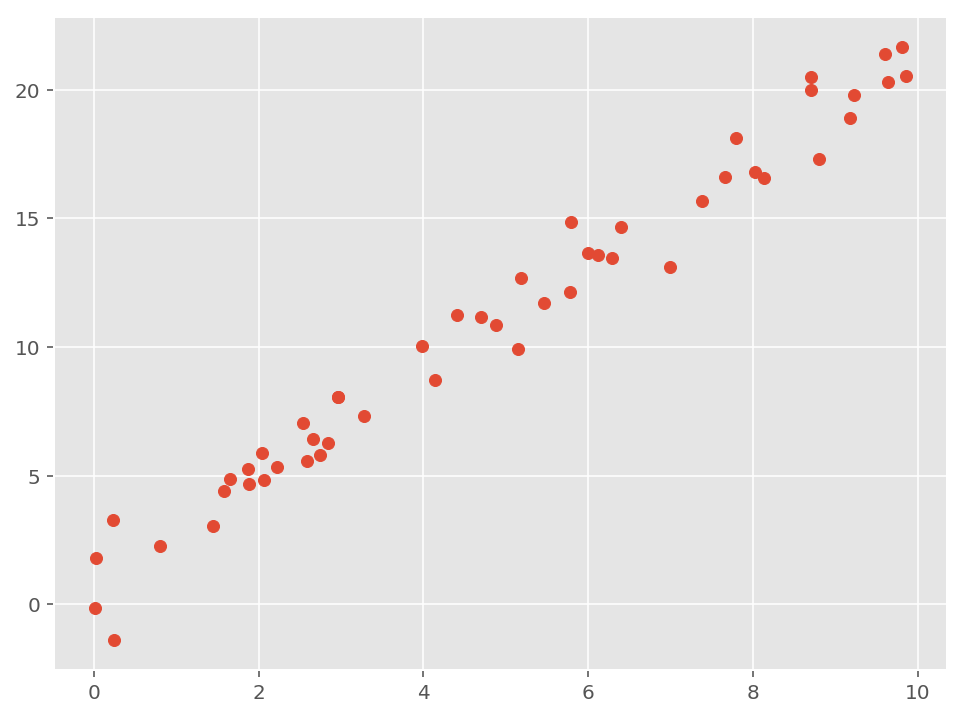

In [3]:
# generate sample data points
np.random.seed(5)
x = np.random.random(50)*10
y = 2*x + 1 + np.random.randn(50)
plt.scatter(x, y)

In [4]:
# import linear regression model from sklearn
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()

In [6]:
x.shape

(50,)

In [7]:
X = x[:, np.newaxis]  # sklearn requires features to be a matrix
X.shape

(50, 1)

In [8]:
y.shape  # target should be a vector

(50,)

In [9]:
# train the model to fit our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
model.coef_  # slope of the line learned by the model

array([2.04896143])

In [11]:
model.intercept_  # y-intercept of the line learned by the model

0.9541494257132754

In [12]:
new_x = np.arange(-1, 11)
new_x

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
new_X = new_x[:, np.newaxis]
y_predict = model.predict(new_X)
y_predict

array([-1.094812  ,  0.95414943,  3.00311086,  5.05207229,  7.10103372,
        9.14999515, 11.19895658, 13.24791801, 15.29687944, 17.34584087,
       19.3948023 , 21.44376373])

In [14]:
model.predict(X)

array([ 5.50270388, 18.79511854,  5.18974519, 19.77613262, 10.96150631,
       13.48854523, 16.647306  , 11.57633405,  7.03547723,  4.800485  ,
        2.60850688, 16.08450628,  9.99640519,  4.19785756, 18.98371981,
        6.57007532,  9.4416652 ,  7.02071305, 13.83777116, 12.83480252,
       13.24646727,  6.40068062,  6.78725332,  6.15007395,  7.66580837,
        3.90802034,  4.34749308, 20.70471418, 20.62882447,  4.81469305,
        1.4521815 ,  5.14541367, 15.29367515, 16.92610263,  1.42403964,
       12.79023859,  0.98779691, 11.51598443, 14.06330582, 21.14921329,
        6.26295924, 17.39700108, 18.79001214, 19.86093311,  0.99951779,
       10.57378508, 21.06406531,  9.12837459, 17.62721404, 12.1508323 ])

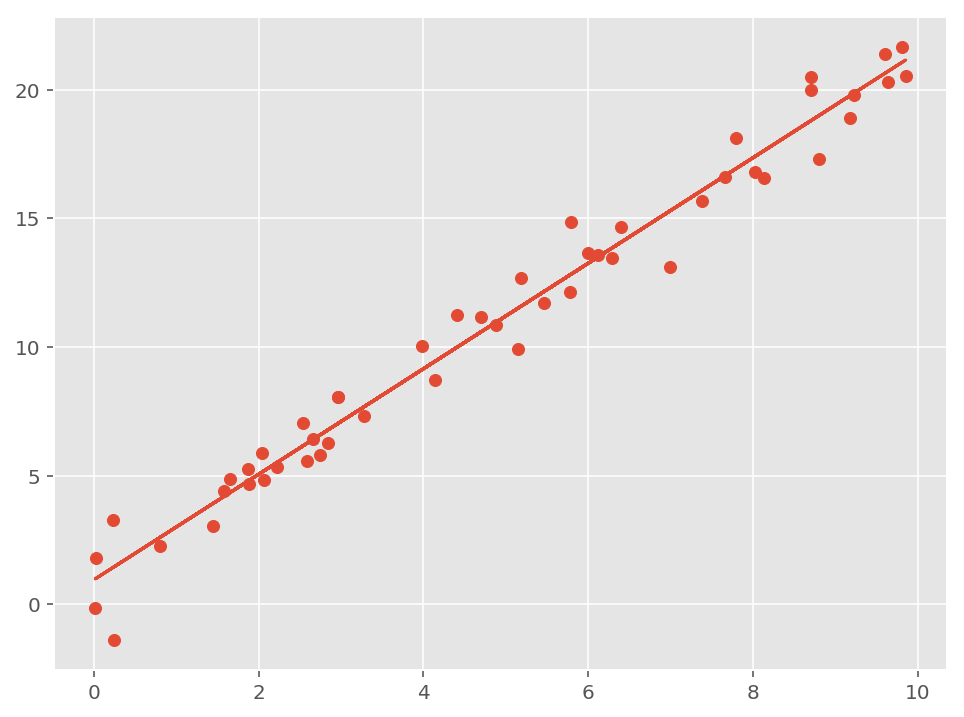

In [15]:
plt.scatter(x, y)
plt.plot(x, model.predict(X))  # plot the line learned by the model

In [16]:
model.score(X, y)  # model performance in terms of coefficient of determination (R-squared)

0.9744249918220852

# Logistic Regression Classifier
It extends the linear regression model by adding a *logistic function* or *sigmoid function*. The output of a sigmoid function ranges from 0 to 1 which can be intrepreted as probability of being in certain class in a *binary classification* task. The word *regression* signifies the output of *logistic* function being a continuous value. To use it for classification, we put a threshold on this output. For example, if the output of logistic function is greater than 0.5, we can classify certain data as being in class 1 else classify it as being in class 0. The sigmoid/logistic function is defined as follows.

$sigmoid(z)=\large\frac{1}{1+e^{-z}}$

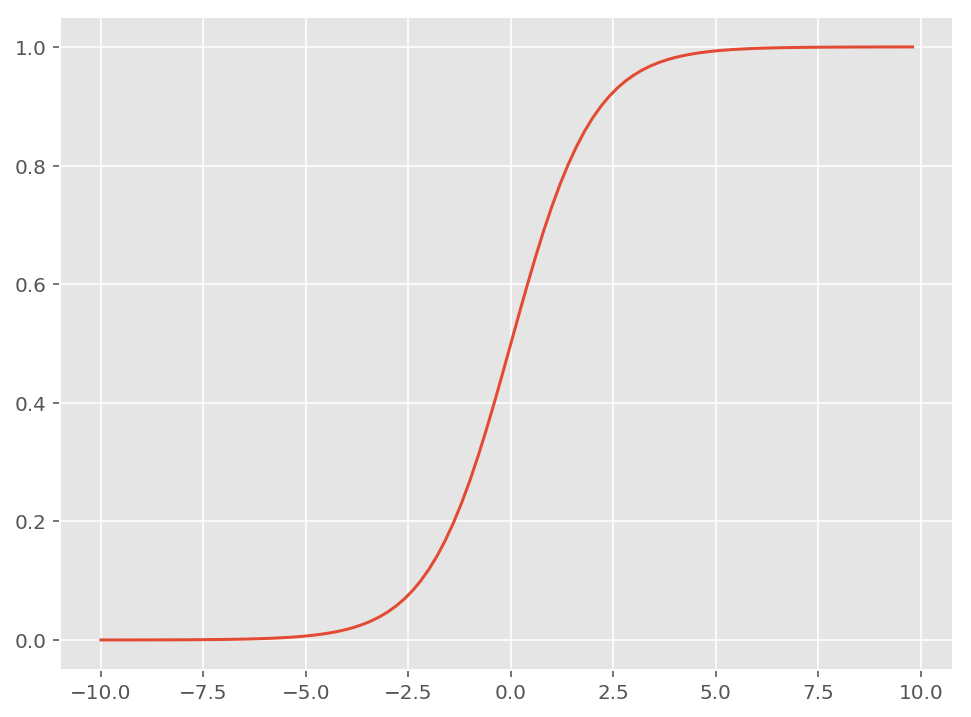

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.arange(-10, 10, step=0.2)
plt.plot(x, sigmoid(x))

Instead of mean squared error, logistic regression uses a different error/cost function as follows.

$Cost(y, \hat{y}) = \large-\frac{1}{n}\sum_{i=1}^{n}\small y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y_i})$

*Gradient descent* can be used for training the model. The performance of a model is generally evaluated in terms of *accuracy* on test data which is defined as the ratio of *number of correct predictions* to *total number of predictions*.

$Accuracy = \large\frac{Number\ of\ Correct\ Predictions}{Total\ Number\ of Predictions}$

Let's see a binary classification task using logistic regression.

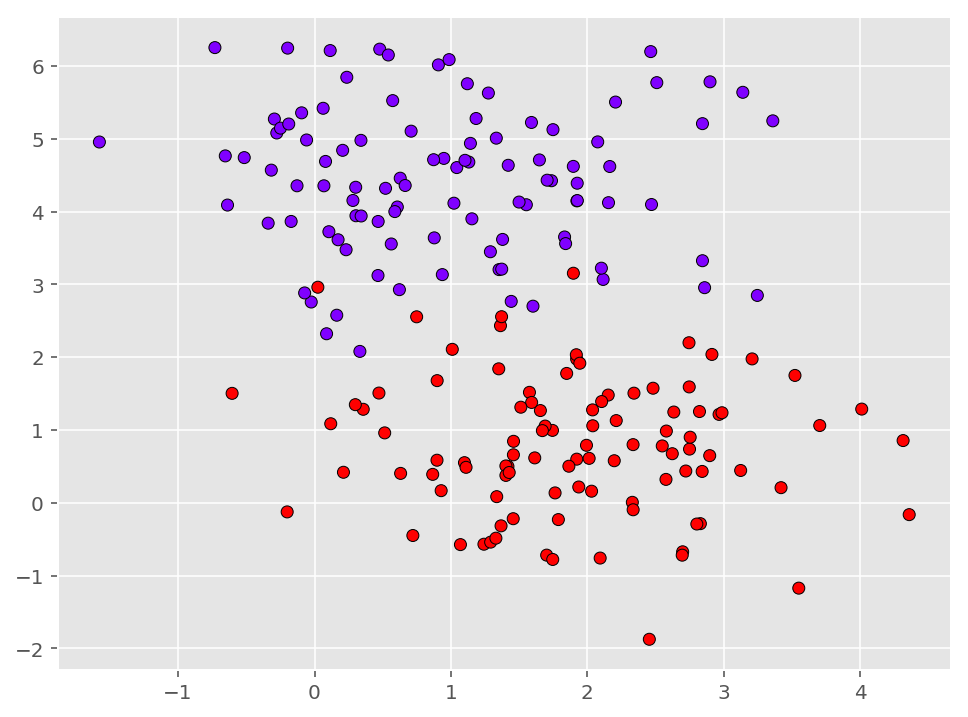

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs

import sys
sys.path.append('../resources')
from plot_utils import plot_decision_boundary

X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolors='k')

In [19]:
model = LogisticRegression()
model.fit(X, y)

/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

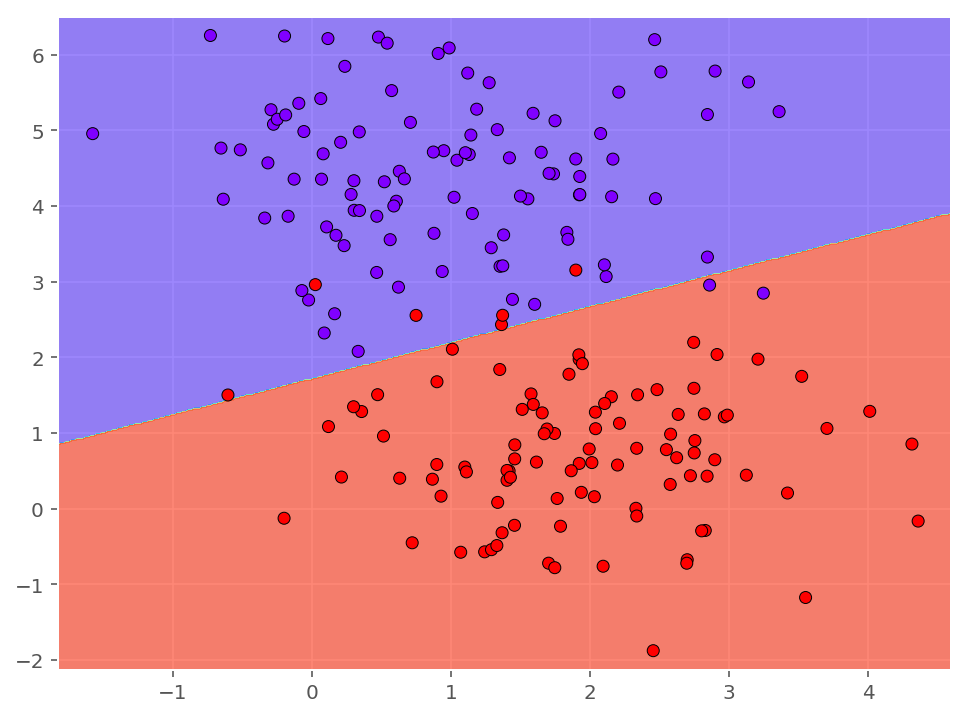

In [20]:
plot_decision_boundary(X, y, model)

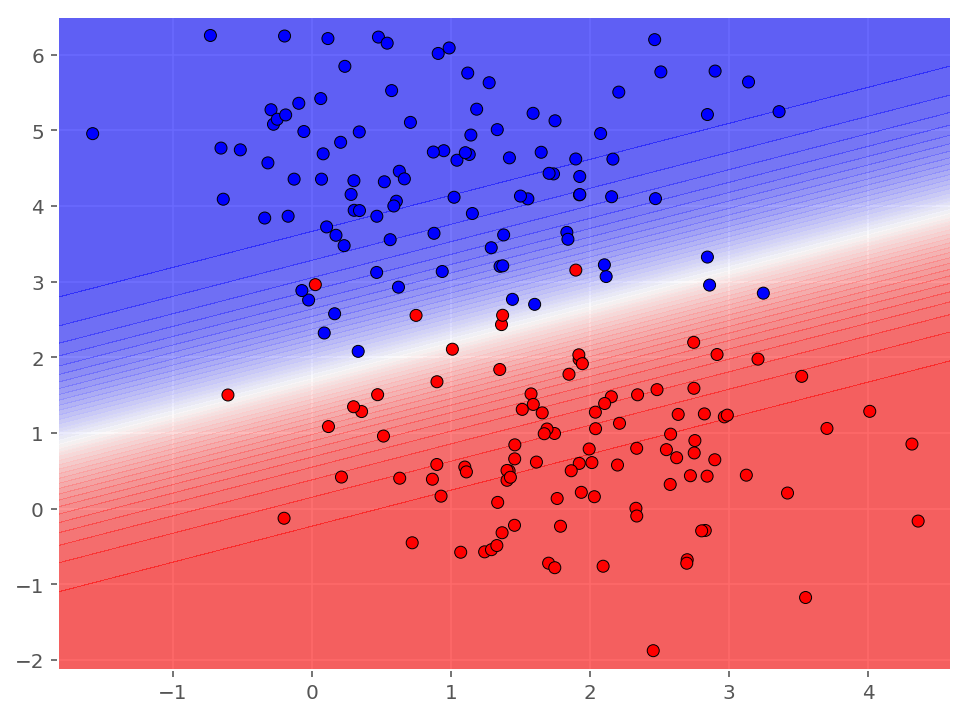

In [21]:
plot_decision_boundary(X, y, model, prob=True, cmap='bwr', levels=40)

Now, let's apply it to classify survival of passengers on titanic dataset.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [24]:
# select columns
columns = ['pclass', 'fare', 'age', 'adult_male', 'alone', 'survived']
titanic = titanic[columns]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
pclass        891 non-null int64
fare          891 non-null float64
age           714 non-null float64
adult_male    891 non-null bool
alone         891 non-null bool
survived      891 non-null int64
dtypes: bool(2), float64(2), int64(2)
memory usage: 29.7 KB


In [25]:
titanic.dropna(inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
pclass        714 non-null int64
fare          714 non-null float64
age           714 non-null float64
adult_male    714 non-null bool
alone         714 non-null bool
survived      714 non-null int64
dtypes: bool(2), float64(2), int64(2)
memory usage: 29.3 KB


In [26]:
X = titanic.drop(['survived'], axis=1)
y = titanic['survived']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
Xtrain.shape

(571, 5)

In [27]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
ytrain_pred = model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

print('Train accuracy: {}'.format(accuracy_score(ytrain, ytrain_pred)))
print('Test accuracy: {}'.format(accuracy_score(ytest, ytest_pred)))

Train accuracy: 0.8038528896672504
Test accuracy: 0.7552447552447552


In [29]:
cm = confusion_matrix(ytest, ytest_pred)
cm

array([[71, 14],
       [21, 37]])

Text(0.5, 33.0, 'Predicted Label')

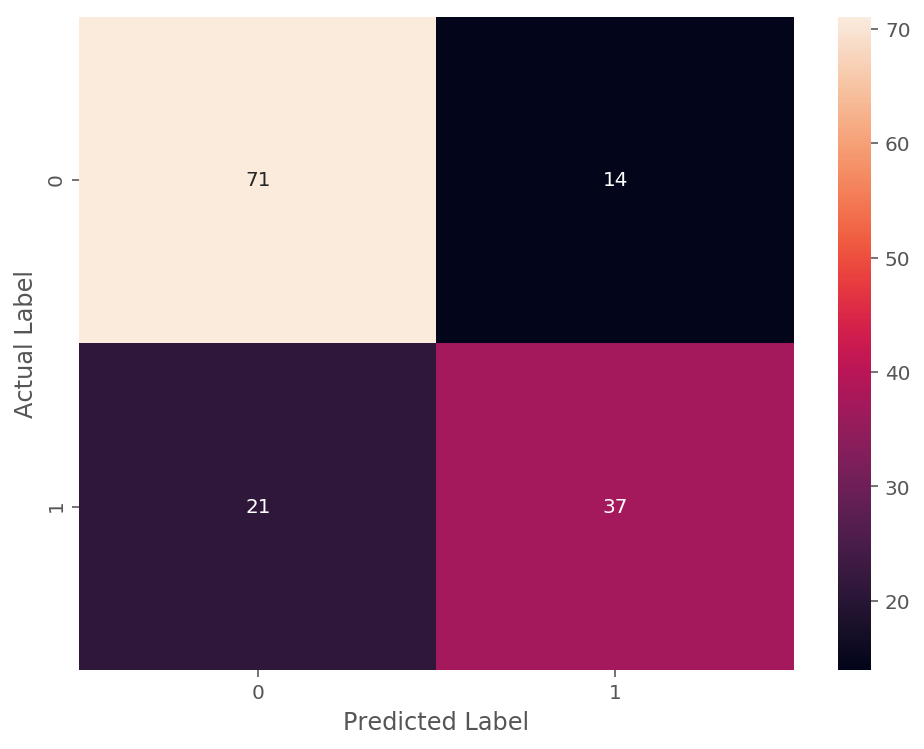

In [30]:
sns.heatmap(cm, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Project 1: House Price Prediction
Train a linear regression model to predict house prices based on dataset `house_data.csv` that we explored in the last class. Consider the following while doing so.
1. Use appropriate columns as features and labels.
2. Use 90% of the data for training and 10% for testing.
3. Calculate the model performance score on both train and test data.

Bonus Task: Experiment by selecting/skipping certain features and observe its effects on the model performance.